In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Train.csv")
print("Dataset Shape:", df.shape)
display(df.head())
df.info()

Dataset Shape: (10999, 12)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


<class 'pandas.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  str  
 2   Mode_of_Shipment     10999 non-null  str  
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  str  
 8   Gender               10999 non-null  str  
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
 11  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(8), str(4)
memory usage: 1.0 MB


In [3]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})

display(missing_df)
print("Duplicate Rows:", df.duplicated().sum())

,Missing Values,Percentage
ID,0,0.0
Warehouse_block,0,0.0
Mode_of_Shipment,0,0.0
Customer_care_calls,0,0.0
Customer_rating,0,0.0
Cost_of_the_Product,0,0.0
Prior_purchases,0,0.0
Product_importance,0,0.0
Gender,0,0.0
Discount_offered,0,0.0


Duplicate Rows: 0


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
skew_vals = df.select_dtypes(include=np.number).skew()
print(skew_vals)

ID                     0.000000
Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Discount_offered       1.798929
Weight_in_gms         -0.249747
Reached.on.Time_Y.N   -0.394257
dtype: float64


In [6]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: Warehouse_block
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Column: Mode_of_Shipment
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Column: Product_importance
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Column: Gender
Gender
F    5545
M    5454
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20936\2987935185.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include='object').columns


In [7]:
for col in cat_cols:
    print(f"\nPercentage distribution of {col}")
    print((df[col].value_counts(normalize=True)*100).round(2))


Percentage distribution of Warehouse_block
Warehouse_block
F    33.33
D    16.67
A    16.67
B    16.67
C    16.67
Name: proportion, dtype: float64

Percentage distribution of Mode_of_Shipment
Mode_of_Shipment
Ship      67.84
Flight    16.16
Road      16.00
Name: proportion, dtype: float64

Percentage distribution of Product_importance
Product_importance
low       48.16
medium    43.22
high       8.62
Name: proportion, dtype: float64

Percentage distribution of Gender
Gender
F    50.41
M    49.59
Name: proportion, dtype: float64


In [8]:
delivery_rate = df['Reached.on.Time_Y.N'].value_counts(normalize=True)*100
print(delivery_rate)

Reached.on.Time_Y.N
1    59.669061
0    40.330939
Name: proportion, dtype: float64


In [9]:
warehouse_delivery = df.groupby('Warehouse_block')['Reached.on.Time_Y.N'].mean()
print(warehouse_delivery)

Warehouse_block
A    0.586470
B    0.602291
C    0.596836
D    0.597601
F    0.598472
Name: Reached.on.Time_Y.N, dtype: float64


In [10]:
shipment_summary = df.groupby('Mode_of_Shipment').agg({
    'Cost_of_the_Product':'mean',
    'Discount_offered':'mean',
    'Weight_in_gms':'mean',
    'Reached.on.Time_Y.N':'mean'
})

display(shipment_summary)

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Mode_of_Shipment,,,,
Flight,209.306697,13.160945,3629.378165,0.601576
Road,210.475568,13.084091,3649.550568,0.588068
Ship,210.343072,13.491959,3631.457518,0.597561


In [11]:
importance_summary = df.groupby('Product_importance').agg({
    'Cost_of_the_Product':'mean',
    'Discount_offered':'mean',
    'Reached.on.Time_Y.N':'mean'
})

display(importance_summary)

,Cost_of_the_Product,Discount_offered,Reached.on.Time_Y.N
Product_importance,,,
high,203.871308,14.666667,0.649789
low,212.059845,13.043043,0.592788
medium,209.382415,13.483172,0.590450


In [12]:
summary_table = df.groupby('Reached.on.Time_Y.N').agg({
    'Cost_of_the_Product':['mean','min','max'],
    'Discount_offered':['mean'],
    'Weight_in_gms':['mean'],
    'Customer_care_calls':['mean'],
    'Customer_rating':['mean']
})

display(summary_table)

Cost_of_the_Product          Discount_offered  \
                                   mean min  max             mean   
Reached.on.Time_Y.N                                                 
0                            214.498647  97  310         5.545987   
1                            207.289197  96  310        18.663721   

                    Weight_in_gms Customer_care_calls Customer_rating  
                             mean                mean            mean  
Reached.on.Time_Y.N                                                    
0                     4168.668395            4.147656        2.967989  
1                     3272.640104            3.991467        3.005790

In [13]:
full_summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Unique Values': df.nunique(),
    'Missing Values': df.isnull().sum(),
    'Skewness': df.select_dtypes(include=np.number).skew()
})

display(full_summary)

,Data Type,Unique Values,Missing Values,Skewness
Cost_of_the_Product,int64,215,0,-0.157117
Customer_care_calls,int64,6,0,0.391926
Customer_rating,int64,5,0,0.004360
Discount_offered,int64,65,0,1.798929
Gender,str,2,0,NaN
ID,int64,10999,0,0.000000
Mode_of_Shipment,str,3,0,NaN
Prior_purchases,int64,8,0,1.681897
Product_importance,str,3,0,NaN
Reached.on.Time_Y.N,int64,2,0,-0.394257


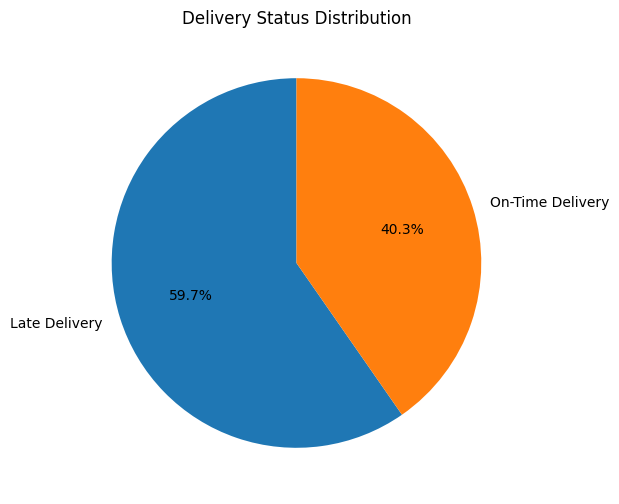

In [14]:
delivery_counts = df['Reached.on.Time_Y.N'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(delivery_counts,
        labels=['Late Delivery','On-Time Delivery'],
        autopct='%1.1f%%',
        startangle=90)
plt.title("Delivery Status Distribution")
plt.show()

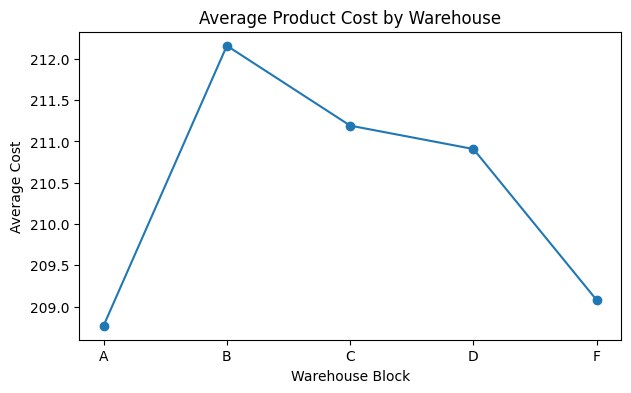

In [15]:
warehouse_cost = df.groupby('Warehouse_block')['Cost_of_the_Product'].mean()

plt.figure(figsize=(7,4))
plt.plot(warehouse_cost.index, warehouse_cost.values, marker='o')
plt.title("Average Product Cost by Warehouse")
plt.xlabel("Warehouse Block")
plt.ylabel("Average Cost")
plt.show()

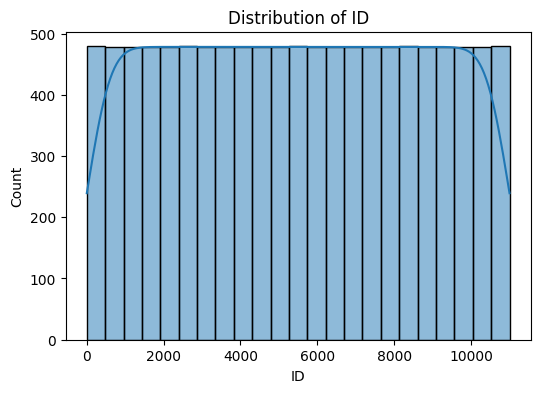

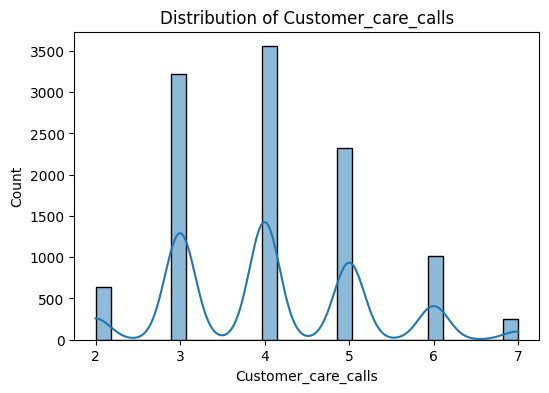

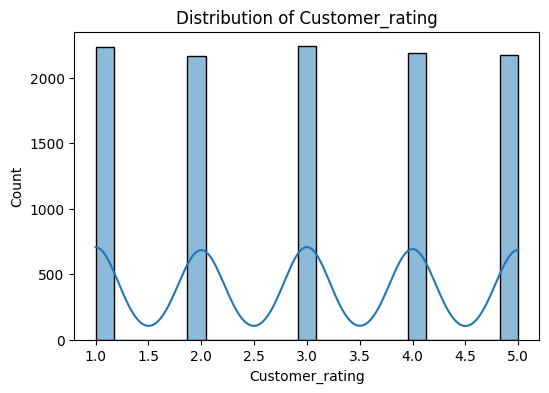

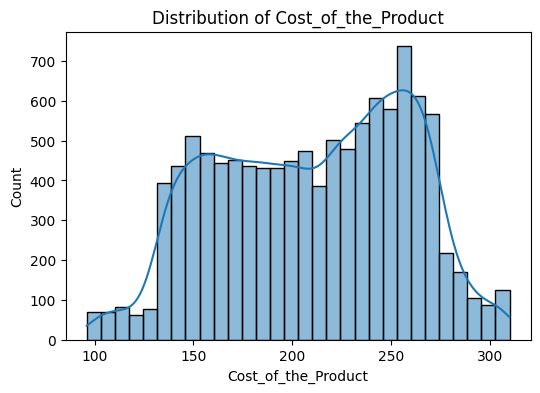

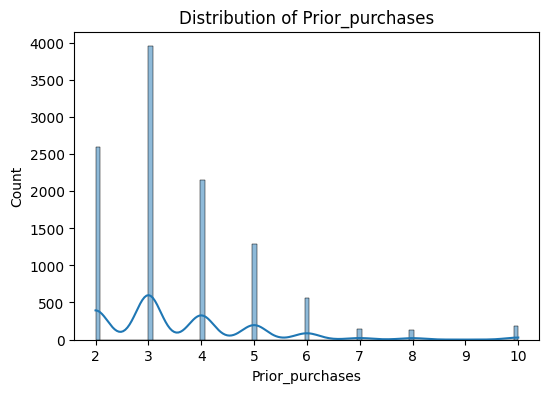

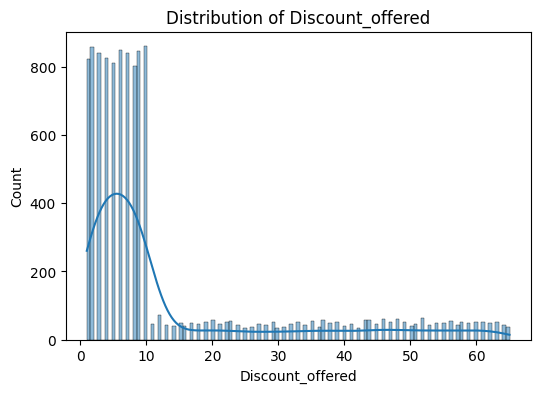

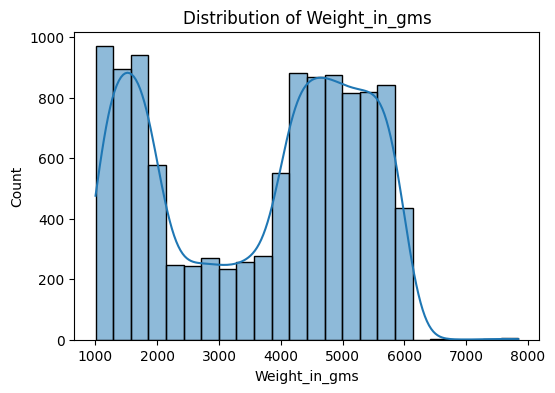

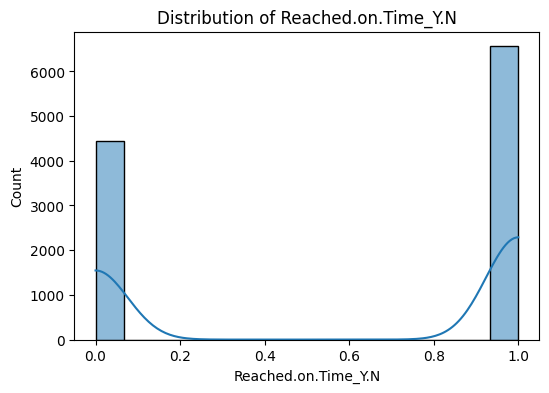

In [16]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

<Figure size 1000x800 with 0 Axes>

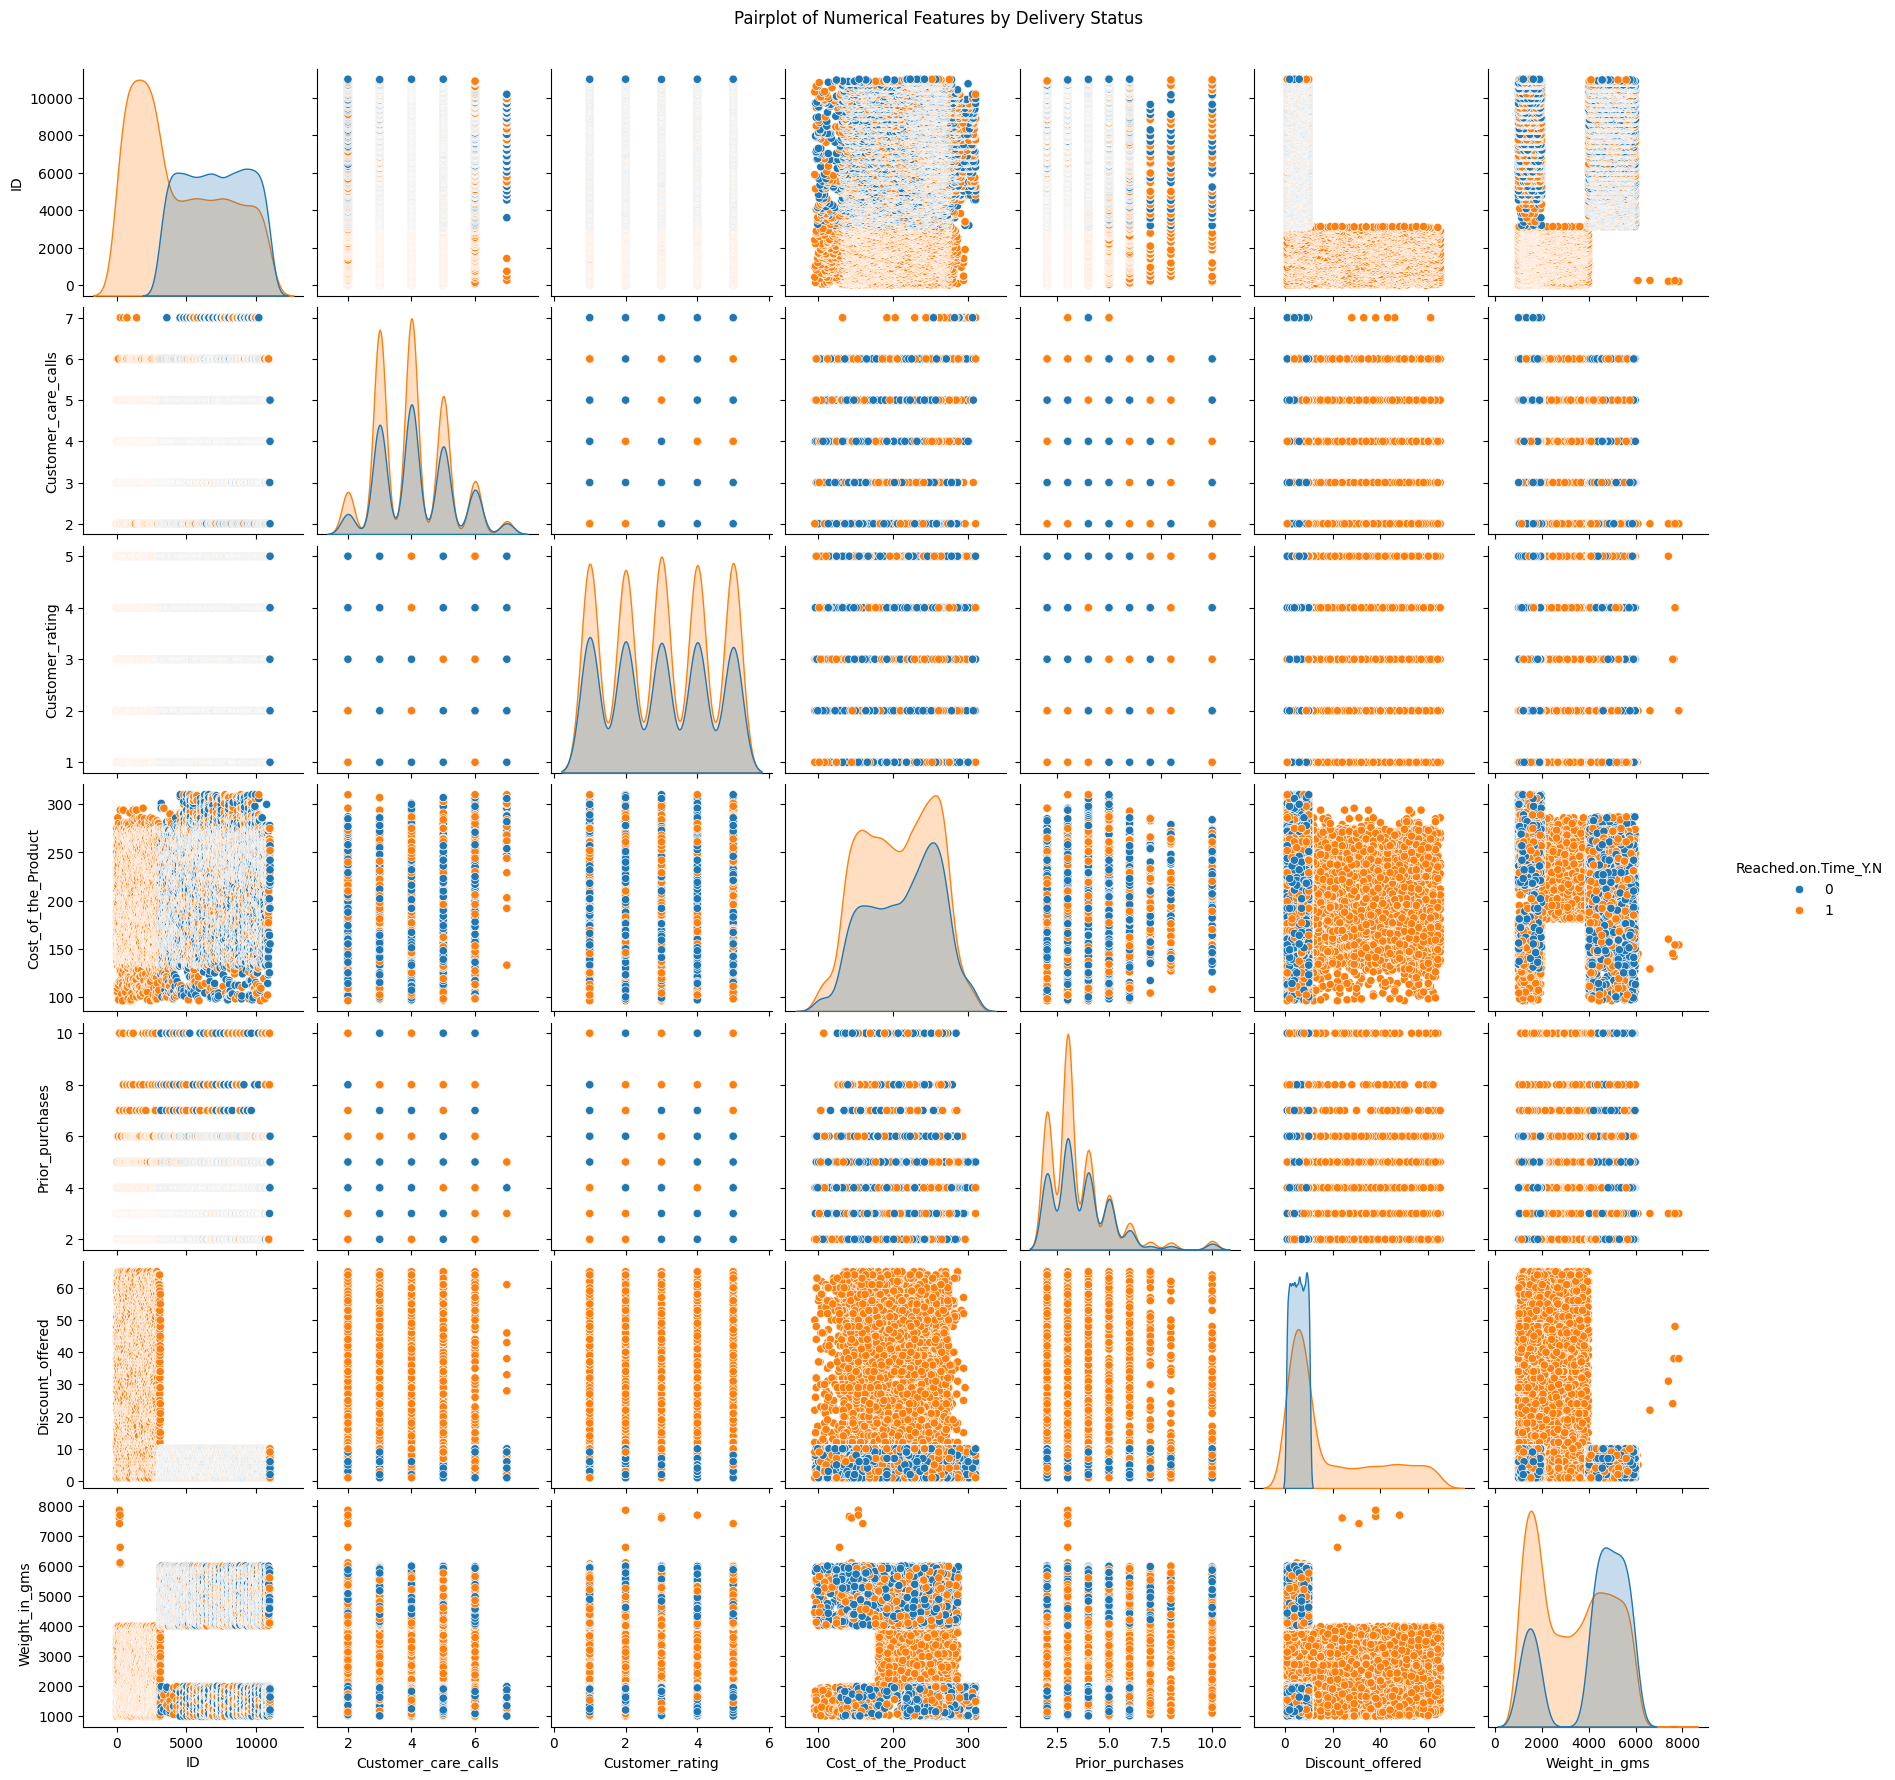

In [17]:
plt.figure(figsize=(10,8))
sns.pairplot(df, hue='Reached.on.Time_Y.N', kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features by Delivery Status", y=1.02)
plt.show()

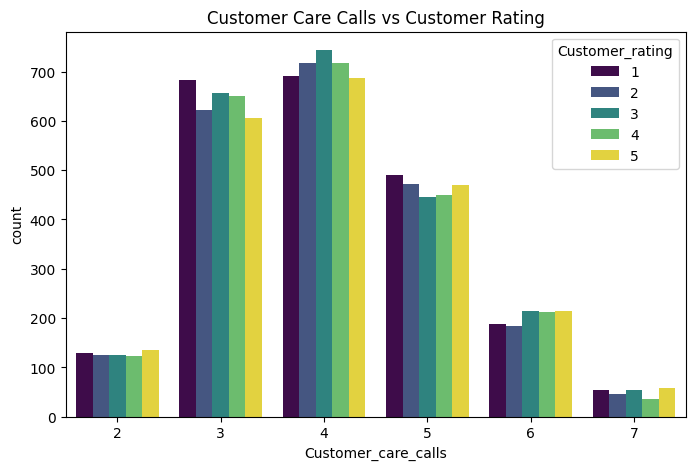

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Customer_care_calls', hue='Customer_rating', data=df, palette='viridis')
plt.title("Customer Care Calls vs Customer Rating")
plt.show()

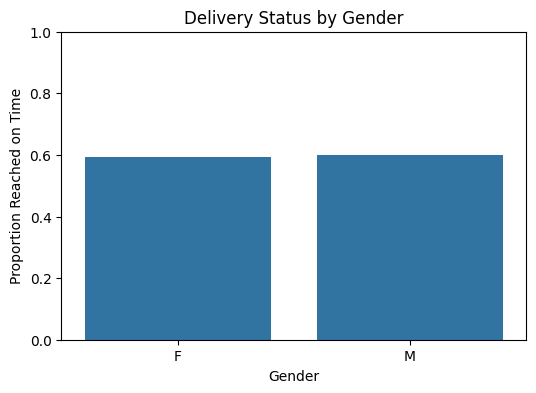

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Reached.on.Time_Y.N', data=df, errorbar=None)
plt.title("Delivery Status by Gender")
plt.ylabel("Proportion Reached on Time")
plt.ylim(0, 1)  # Ensure y-axis is 0-1 for proportion
plt.show()